In [1]:

import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np



df_train = pd.read_csv("../DATA/processed/synthetic_sales_expanded.csv")
df_train.head(2)

df_train['year'] = pd.to_datetime(df_train['DATE']).dt.year
df_train['month'] = pd.to_datetime(df_train['DATE']).dt.month
df_train['day'] = pd.to_datetime(df_train['DATE']).dt.day


df_train_less_500k = df_train[df_train['UNITARY_PRICE']<500]




In [2]:
df_train_less_500k

,PRODUTO,DATE,CLASSE TERAPÊUTICA,LABORATÓRIO,APRESENTAÇÃO,TARJA,PF Sem Impostos,PMC 0%,PMC 12%,PMC 18%,PMC 21%,PMC 22%,PROD_KEY,UNITARY_PRICE,year,month,day
0,BAYCUTEN N,2023-01-01,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",50.386250,2023,1,1
1,BAYCUTEN N,2023-01-02,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",47.706926,2023,1,2
2,BAYCUTEN N,2023-01-03,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",46.073566,2023,1,3
3,BAYCUTEN N,2023-01-04,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",40.651228,2023,1,4
4,BAYCUTEN N,2023-01-05,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",40.650933,2023,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820297,VITER C + ZN,2024-12-27,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,31.966434,2024,12,27
15820298,VITER C + ZN,2024-12-28,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,31.261772,2024,12,28
15820299,VITER C + ZN,2024-12-29,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,37.899581,2024,12,29
15820300,VITER C + ZN,2024-12-30,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,38.525748,2024,12,30


In [4]:
# Generate a slope for each unique product in order of appearance

intercept = 40
error_std = 5
product_slopes = pd.Series(
    np.random.uniform(-1, 0.01, size = df_train_less_500k['PRODUTO'].nunique()),
    index=df_train_less_500k['PRODUTO'].unique()
)

# Generate noise for each product group (aligned with original DataFrame)
noise = df_train_less_500k.groupby('PRODUTO', sort=False)['PRODUTO'].transform(
    lambda x: np.random.normal(60, 25, len(x))
)

# Vectorized computation of QUANTITY_SOLD with non-negativity constraint
df_train_less_500k['QUANTITY_SOLD'] = np.maximum(
    0,  # Ensure quantity sold is at least 0
    np.round(  # Round to nearest integer
        intercept 
        + df_train_less_500k['PRODUTO'].map(product_slopes) * df_train_less_500k['UNITARY_PRICE'] 
        + noise
    )
)

/tmp/ipykernel_11558/1010361140.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_less_500k['QUANTITY_SOLD'] = np.maximum(


In [5]:
df_train_less_500k["REVENUE"] = df_train_less_500k["UNITARY_PRICE"] * df_train_less_500k["QUANTITY_SOLD"]
df_train_less_500k["PROFIT"] = (df_train_less_500k["UNITARY_PRICE"] - df_train_less_500k["PF Sem Impostos"]) * df_train_less_500k["QUANTITY_SOLD"]
df_train_less_500k

/tmp/ipykernel_11558/2092261060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_less_500k["REVENUE"] = df_train_less_500k["UNITARY_PRICE"] * df_train_less_500k["QUANTITY_SOLD"]
/tmp/ipykernel_11558/2092261060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_less_500k["PROFIT"] = (df_train_less_500k["UNITARY_PRICE"] - df_train_less_500k["PF Sem Impostos"]) * df_train_less_500k["QUANTITY_SOLD"]


,PRODUTO,DATE,CLASSE TERAPÊUTICA,LABORATÓRIO,APRESENTAÇÃO,TARJA,PF Sem Impostos,PMC 0%,PMC 12%,PMC 18%,PMC 21%,PMC 22%,PROD_KEY,UNITARY_PRICE,year,month,day,QUANTITY_SOLD,REVENUE,PROFIT
0,BAYCUTEN N,2023-01-01,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",50.386250,2023,1,1,38.0,1914.677510,934.657510
1,BAYCUTEN N,2023-01-02,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",47.706926,2023,1,2,58.0,2767.001696,1271.181696
2,BAYCUTEN N,2023-01-03,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",46.073566,2023,1,3,34.0,1566.501259,689.641259
3,BAYCUTEN N,2023-01-04,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",40.651228,2023,1,4,29.0,1178.885622,430.975622
4,BAYCUTEN N,2023-01-05,D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,BAYER S.A.,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",- (*),25.79,38.74,44.58,48.22,50.26,50.99,"BAYCUTEN N10 MG/G + 0,443 MG/G CREM DERM CT BG...",40.650933,2023,1,5,151.0,6138.290864,2244.000864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820297,VITER C + ZN,2024-12-27,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,31.966434,2024,12,27,128.0,4091.703555,1544.503555
15820298,VITER C + ZN,2024-12-28,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,31.261772,2024,12,28,84.0,2625.988847,954.388847
15820299,VITER C + ZN,2024-12-29,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,37.899581,2024,12,29,67.0,2539.271918,1205.971918
15820300,VITER C + ZN,2024-12-30,A11G2 - ASSOCIAÇÕES COM VITAMINA C,NATULAB LABORATORIO S.A,1 G + 10 MG COM EFERV CT TB PLAS X 10,- (*),19.90,29.90,34.41,37.21,38.79,39.36,VITER C + ZN1 G + 10 MG COM EFERV CT TB PLAS X 10,38.525748,2024,12,30,81.0,3120.585586,1508.685586


In [6]:
df_train_less_500k_positive_sales = df_train_less_500k[df_train_less_500k['QUANTITY_SOLD']>0]

In [77]:
df_train_grouped = df_train_less_500k_positive_sales.groupby(["PROD_KEY","APRESENTAÇÃO","PF Sem Impostos","PMC 0%","PMC 22%","month","year","CLASSE TERAPÊUTICA","TARJA"]).agg(
    UNITARY_PRICE_MEAN=("UNITARY_PRICE", "mean"),
    QUANTITY_SOLD_TOTAL=("QUANTITY_SOLD", "sum"),
    TOTAL_REVENUE=("REVENUE", "sum"),
    TOTAL_PROFIT = ("PROFIT", "sum")).reset_index()

df_train_grouped.sample(20).to_csv("../DATA/processed/keys_sample.csv", index=False)
#df_train_grouped['PROD_KEY'].sample(20)

In [78]:
df_train_grouped

,PROD_KEY,APRESENTAÇÃO,PF Sem Impostos,PMC 0%,PMC 22%,month,year,CLASSE TERAPÊUTICA,TARJA,UNITARY_PRICE_MEAN,QUANTITY_SOLD_TOTAL,TOTAL_REVENUE,TOTAL_PROFIT
0,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,1,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.520317,2724.0,53325.364887,23170.684887
1,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,1,2024,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),18.993252,2559.0,48373.579318,20045.449318
2,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,2,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.563846,2172.0,42432.817958,18388.777958
3,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,2,2024,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.402758,2360.0,45690.241756,19565.041756
4,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,3,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),18.876765,2633.0,49813.262852,20665.952852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387571,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,10,2024,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.086685,878.0,65283.577089,23236.157089
387572,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,11,2023,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.057191,1047.0,77339.296278,27198.466278
387573,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,11,2024,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.232478,832.0,61558.466728,21713.986728
387574,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,12,2023,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.485409,935.0,70680.644382,25903.494382


/tmp/ipykernel_11558/1820516237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['PREDICTED_SALES'] = model.predict(sm.add_constant(df_product['UNITARY_PRICE_MEAN']))


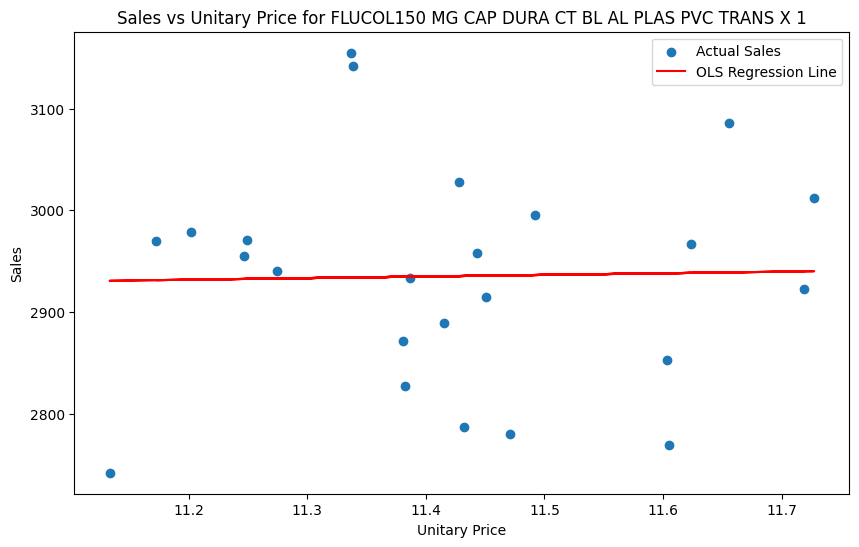

In [13]:
#Choose one product, for example, 'BAYCUTEN N'

product_name = 'FLUCOL150 MG CAP DURA CT BL AL PLAS PVC TRANS X 1'
df_product = df_train_grouped[df_train_grouped['PROD_KEY'] == product_name]

# Fit an OLS model
model = sm.OLS(df_product['QUANTITY_SOLD_TOTAL'], sm.add_constant(df_product['UNITARY_PRICE_MEAN'])).fit()

# Predict the values
df_product['PREDICTED_SALES'] = model.predict(sm.add_constant(df_product['UNITARY_PRICE_MEAN']))

# Plot the scatterplot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_product['UNITARY_PRICE_MEAN'], df_product['QUANTITY_SOLD_TOTAL'], label='Actual Sales')
plt.plot(df_product['UNITARY_PRICE_MEAN'], df_product['PREDICTED_SALES'], color='red', label='OLS Regression Line')
plt.xlabel('Unitary Price')
plt.ylabel('Sales')
plt.title(f'Sales vs Unitary Price for {product_name}')
plt.legend()
plt.show()

                             OLS Regression Results                            
Dep. Variable:     QUANTITY_SOLD_TOTAL   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.045
Method:                  Least Squares   F-statistic:                   0.01288
Date:                 Thu, 30 Jan 2025   Prob (F-statistic):              0.911
Time:                         16:56:47   Log-Likelihood:                -146.18
No. Observations:                   24   AIC:                             296.4
Df Residuals:                       22   BIC:                             298.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2755.2

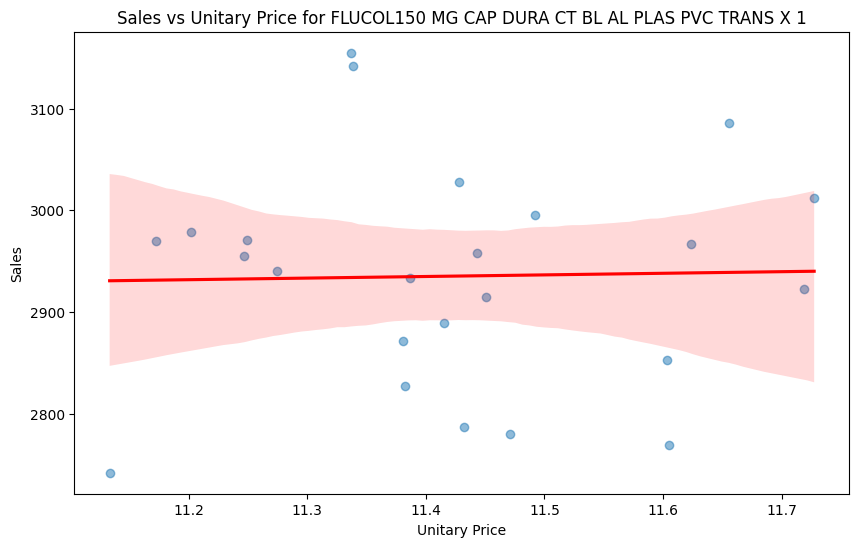

In [14]:
import seaborn as sns
product_name = 'FLUCOL150 MG CAP DURA CT BL AL PLAS PVC TRANS X 1'
df_product = df_train_grouped[df_train_grouped['PROD_KEY'] == product_name]

# Check if data exists
if df_product.empty:
    raise ValueError(f"No data found for product: {product_name}")

# Fit OLS model
X = sm.add_constant(df_product['UNITARY_PRICE_MEAN'])
model = sm.OLS(df_product['QUANTITY_SOLD_TOTAL'], X).fit()

# Print model diagnostics
print(model.summary())

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df_product['UNITARY_PRICE_MEAN'],
    y=df_product['QUANTITY_SOLD_TOTAL'],
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title(f'Sales vs Unitary Price for {product_name}')
plt.xlabel('Unitary Price')
plt.ylabel('Sales')
plt.show()

/tmp/ipykernel_11558/4275695991.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['PREDICTED_SALES'] = model.predict(X)
/tmp/ipykernel_11558/4275695991.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['PREDICTED_SALES'] = model.predict(X)


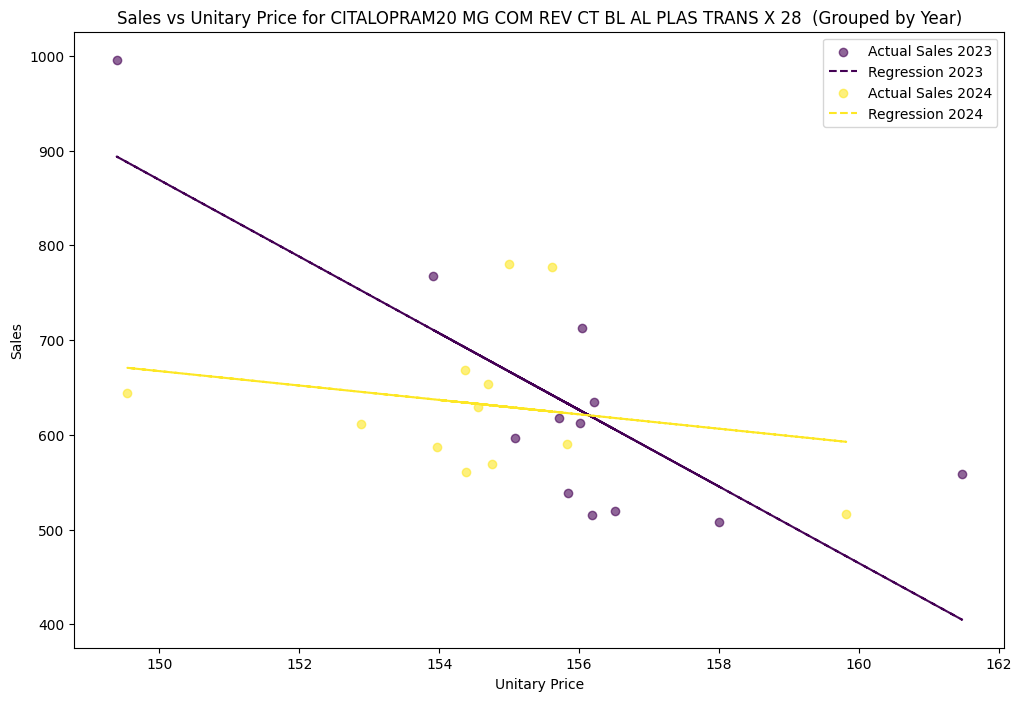


Year 2023 Regression Summary:
                             OLS Regression Results                            
Dep. Variable:     QUANTITY_SOLD_TOTAL   R-squared:                       0.633
Model:                             OLS   Adj. R-squared:                  0.597
Method:                  Least Squares   F-statistic:                     17.26
Date:                 Thu, 30 Jan 2025   Prob (F-statistic):            0.00196
Time:                         17:00:15   Log-Likelihood:                -69.769
No. Observations:                   12   AIC:                             143.5
Df Residuals:                       10   BIC:                             144.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

/home/jrzs/Área de trabalho/PrincingApp/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/jrzs/Área de trabalho/PrincingApp/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming your data has a 'YEAR' column. If not, create it from a date column:
# df_train_grouped['YEAR'] = pd.to_datetime(df_train_grouped['DATE']).dt.year

product_name = 'CITALOPRAM20 MG COM REV CT BL AL PLAS TRANS X 28 '
df_product = df_train_grouped[df_train_grouped['PROD_KEY'] == product_name]

# Check if data exists
if df_product.empty:
    raise ValueError(f"No data found for product: {product_name}")

# Create a figure
plt.figure(figsize=(12, 8))

# Define colors for different years (using a colormap)
years = df_product['year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))  # Use a colormap like viridis, rainbow, etc.

# Loop through each year and fit/predict/plot
for idx, year in enumerate(years):
    # Filter data for the year
    df_year = df_product[df_product['year'] == year]
    
    # Fit OLS model
    X = sm.add_constant(df_year['UNITARY_PRICE_MEAN'])
    model = sm.OLS(df_year['QUANTITY_SOLD_TOTAL'], X).fit()
    
    # Predict values
    df_year['PREDICTED_SALES'] = model.predict(X)
    
    # Plot scatter points
    plt.scatter(
        df_year['UNITARY_PRICE_MEAN'],
        df_year['QUANTITY_SOLD_TOTAL'],
        color=colors[idx],
        alpha=0.6,
        label=f'Actual Sales {year}'
    )
    
    # Plot regression line
    plt.plot(
        df_year['UNITARY_PRICE_MEAN'],
        df_year['PREDICTED_SALES'],
        color=colors[idx],
        linestyle='--',
        label=f'Regression {year}'
    )

# Add labels and legend
plt.xlabel('Unitary Price')
plt.ylabel('Sales')
plt.title(f'Sales vs Unitary Price for {product_name} (Grouped by Year)')
plt.legend()
plt.show()

# Optional: Print model summaries
for year in years:
    df_year = df_product[df_product['year'] == year]
    X = sm.add_constant(df_year['UNITARY_PRICE_MEAN'])
    model = sm.OLS(df_year['QUANTITY_SOLD_TOTAL'], X).fit()
    print(f"\nYear {year} Regression Summary:")
    print(model.summary())

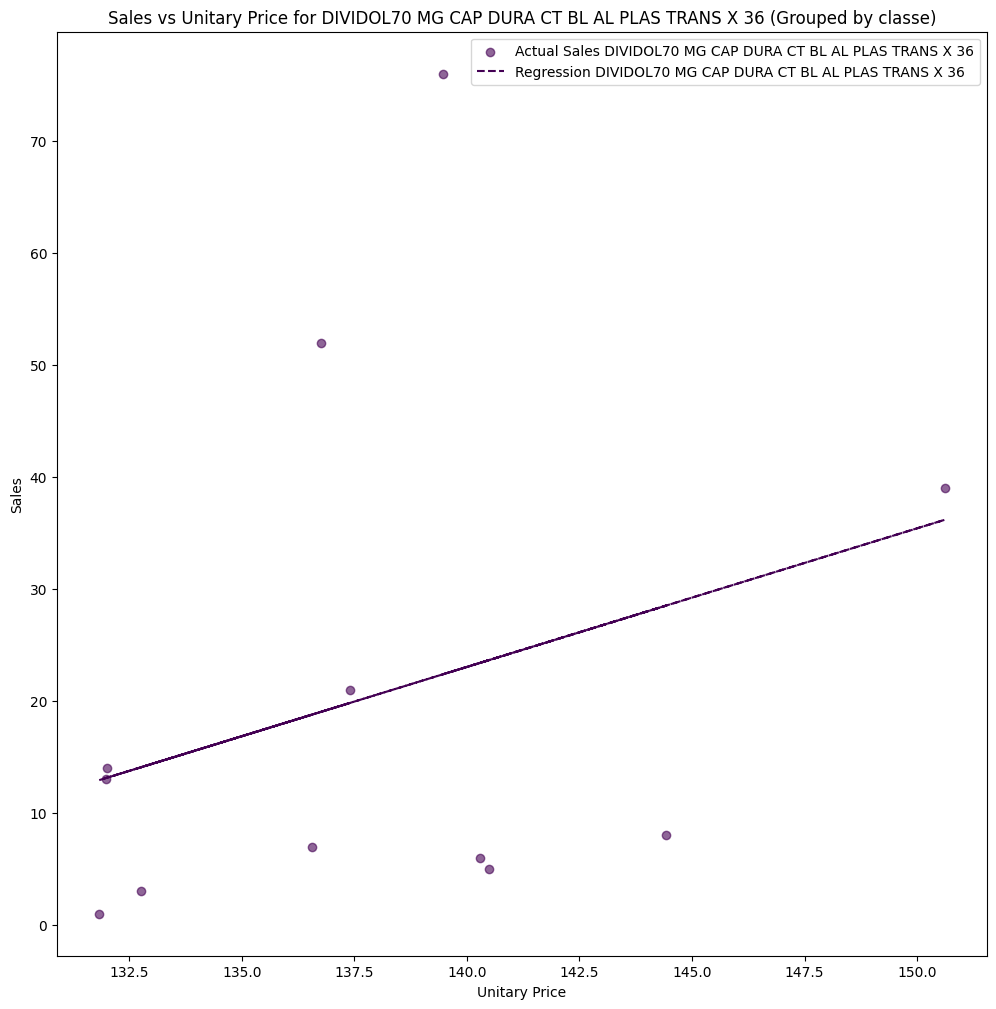

/tmp/ipykernel_11558/2099438064.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_sales = model.params[0] + model.params[1] * price_range
/tmp/ipykernel_11558/2099438064.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profit_derivative = predicted_sales + (price_range - df_lab['PF Sem Impostos'].mean()) * model.params[1]


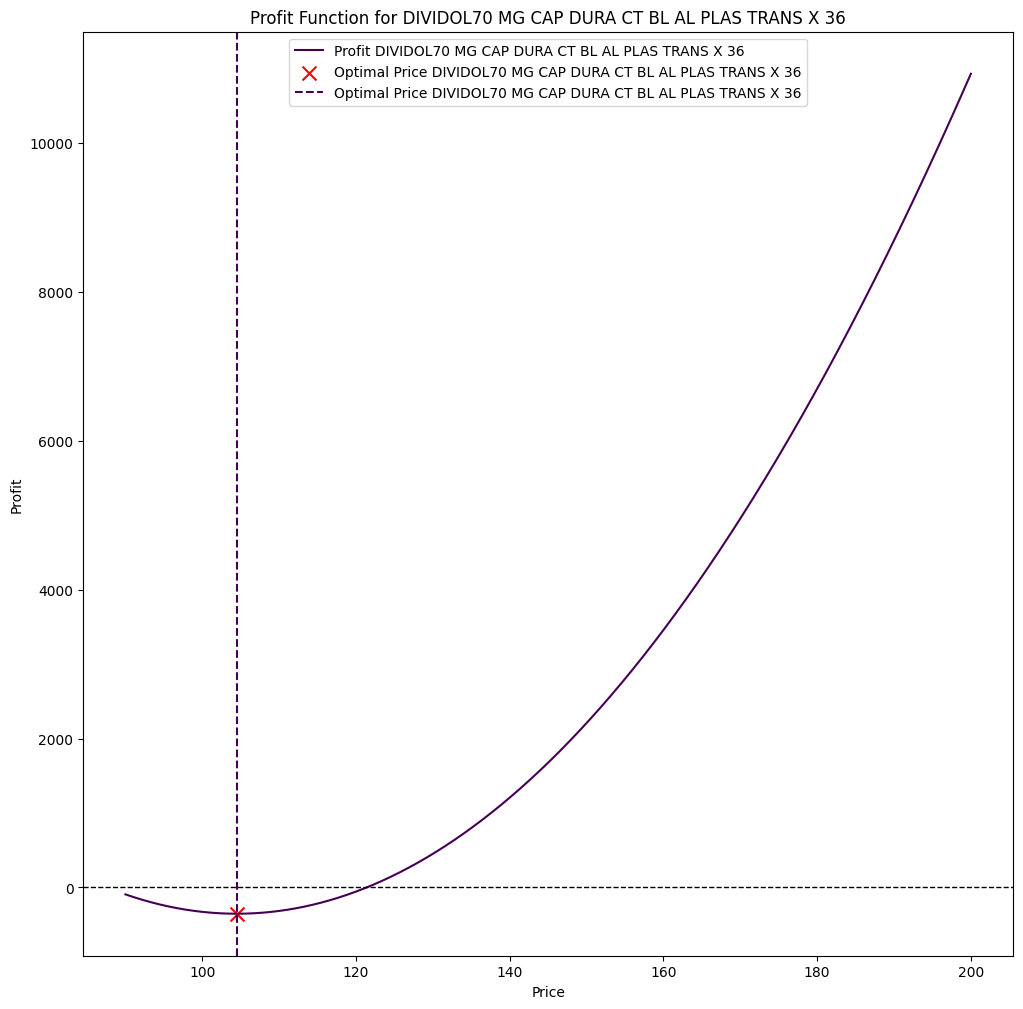

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

product_name = 'DIVIDOL70 MG CAP DURA CT BL AL PLAS TRANS X 36'
classe = "PROD_KEY"
df_product = df_train_grouped[df_train_grouped['PROD_KEY'] == product_name]

if df_product.empty:
    raise ValueError(f"No data found for product: {product_name}")

plt.figure(figsize=(12, 12))

# Agrupando por classe em vez de ano
laboratories = df_product[classe].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(laboratories)))

for idx, lab in enumerate(laboratories):
    df_lab = df_product[df_product[classe] == lab]
    
    X = sm.add_constant(df_lab['UNITARY_PRICE_MEAN'])
    model = sm.OLS(df_lab['QUANTITY_SOLD_TOTAL'], X).fit()
    
    df_lab['PREDICTED_SALES'] = model.predict(X)
    
    plt.scatter(
        df_lab['UNITARY_PRICE_MEAN'],
        df_lab['QUANTITY_SOLD_TOTAL'],
        color=colors[idx],
        alpha=0.6,
        label=f'Actual Sales {lab}'
    )
    
    plt.plot(
        df_lab['UNITARY_PRICE_MEAN'],
        df_lab['PREDICTED_SALES'],
        color=colors[idx],
        linestyle='--',
        label=f'Regression {lab}'
    )

plt.xlabel('Unitary Price')
plt.ylabel('Sales')
plt.title(f'Sales vs Unitary Price for {product_name} (Grouped by classe)')
plt.legend()
plt.show()

# Profit Function Plot
plt.figure(figsize=(12, 12))
price_range = np.linspace(90, 200, 1000000)

for idx, lab in enumerate(laboratories):
    df_lab = df_product[df_product[classe] == lab]
    
    X = sm.add_constant(df_lab['UNITARY_PRICE_MEAN'])
    model = sm.OLS(df_lab['QUANTITY_SOLD_TOTAL'], X).fit()
    
    predicted_sales = model.params[0] + model.params[1] * price_range
    profit = (price_range - df_lab['PF Sem Impostos'].mean()) * predicted_sales
    
    # Compute the derivative of the profit function
    profit_derivative = predicted_sales + (price_range - df_lab['PF Sem Impostos'].mean()) * model.params[1]
    
    # Find the price that maximizes the profit (where derivative equals 0)
    optimal_price = price_range[np.argmin(np.abs(profit_derivative))]
    
    # Plot the profit curve
    plt.plot(price_range, profit, color=colors[idx], label=f'Profit {lab}')
    
    # Indicate the optimal price on the plot
    plt.scatter(optimal_price, np.interp(optimal_price, price_range, profit), color='red', marker='x', s=100, label=f'Optimal Price {lab}')
    plt.axvline(optimal_price, color=colors[idx], linestyle='--', linewidth=1.5, label=f'Optimal Price {lab}')
    #plt.scatter(optimal_price, optimal_price, color='red', marker='x', s=100, label=f'Optimal Price {lab}')
    

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Price')
plt.ylabel('Profit')
plt.title(f'Profit Function for {product_name}')
plt.legend()
plt.show()


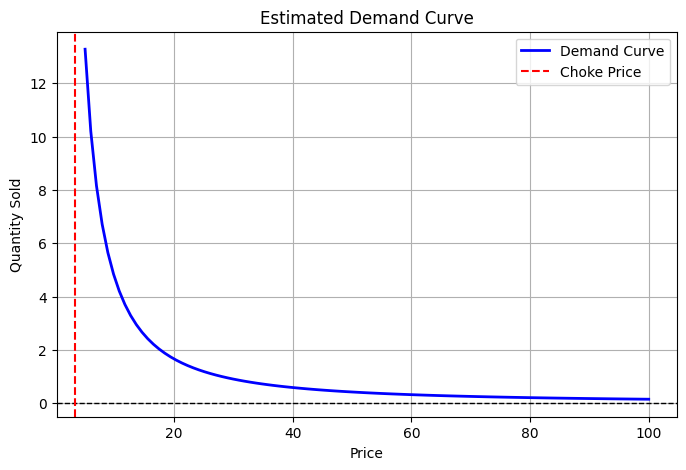

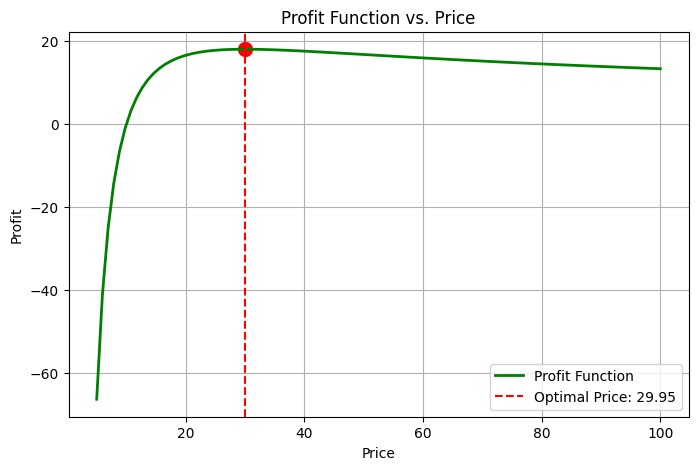

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated elasticity and intercept (from a model fit)
alpha = 5   # Intercept (log scale)
beta = -1.5 # Elasticity (negative slope)

# Generate price range
prices = np.linspace(5, 100, 100)  # Price range from 5 to 100

# Compute estimated demand
demand = np.exp(alpha + beta * np.log(prices))

# Plot the demand curve
plt.figure(figsize=(8, 5))
plt.plot(prices, demand, label="Demand Curve", color="blue", linewidth=2)

# Labels and title
plt.xlabel("Price")
plt.ylabel("Quantity Sold")
plt.title("Estimated Demand Curve")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero demand line
plt.axvline(-alpha/beta, color='red', linestyle='--', label="Choke Price")  # When Q = 0
plt.legend()
plt.grid()

# Show the plot
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Simulated parameters (from an estimated model)
alpha = 5    # Intercept (log scale)
beta = -1.0  # Price elasticity
MC = 10      # Assumed marginal cost

# Generate a range of prices
prices = np.linspace(5, 100, 100)  # Price range from 5 to 100

# Compute demand function Q(P)
demand = np.exp(alpha + beta * np.log(prices))

# Compute profit function: Profit(P) = (P - MC) * Q(P)
profit = (prices - MC) * demand

# Find the optimal price where profit is maximized
optimal_price = prices[np.argmax(profit)]
max_profit = max(profit)

# Plot the profit function
plt.figure(figsize=(8, 5))
plt.plot(prices, profit, label="Profit Function", color="green", linewidth=2)

# Mark the optimal price
plt.axvline(optimal_price, color="red", linestyle="--", label=f"Optimal Price: {optimal_price:.2f}")
plt.scatter(optimal_price, max_profit, color="red", s=100)

# Labels and title
plt.xlabel("Price")
plt.ylabel("Profit")
plt.title("Profit Function vs. Price")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [57]:
df_train_grouped

,PROD_KEY,APRESENTAÇÃO,PF Sem Impostos,month,year,CLASSE TERAPÊUTICA,TARJA,UNITARY_PRICE_MEAN,QUANTITY_SOLD_TOTAL,TOTAL_REVENUE,TOTAL_PROFIT
0,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,1,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.520317,2724.0,53325.364887,23170.684887
1,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,1,2024,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),18.993252,2559.0,48373.579318,20045.449318
2,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,2,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.563846,2172.0,42432.817958,18388.777958
3,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,2,2024,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.402758,2360.0,45690.241756,19565.041756
4,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,3,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),18.876765,2633.0,49813.262852,20665.952852
...,...,...,...,...,...,...,...,...,...,...,...
387523,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,10,2024,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.086685,878.0,65283.577089,23236.157089
387524,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,11,2023,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.057191,1047.0,77339.296278,27198.466278
387525,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,11,2024,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.232478,832.0,61558.466728,21713.986728
387526,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,12,2023,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.485409,935.0,70680.644382,25903.494382


In [56]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [79]:
df_train_grouped

,PROD_KEY,APRESENTAÇÃO,PF Sem Impostos,PMC 0%,PMC 22%,month,year,CLASSE TERAPÊUTICA,TARJA,UNITARY_PRICE_MEAN,QUANTITY_SOLD_TOTAL,TOTAL_REVENUE,TOTAL_PROFIT
0,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,1,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.520317,2724.0,53325.364887,23170.684887
1,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,1,2024,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),18.993252,2559.0,48373.579318,20045.449318
2,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,2,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.563846,2172.0,42432.817958,18388.777958
3,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,2,2024,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),19.402758,2360.0,45690.241756,19565.041756
4,"A SAÚDE DA MULHER(0,625 ML + 400 MG + 0,30 ML ...","(0,625 ML + 400 MG + 0,30 ML + 0,013 ML) 15 ML...",11.07,16.63,21.90,3,2023,G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS,- (*),18.876765,2633.0,49813.262852,20665.952852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387571,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,10,2024,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.086685,878.0,65283.577089,23236.157089
387572,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,11,2023,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.057191,1047.0,77339.296278,27198.466278
387573,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,11,2024,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.232478,832.0,61558.466728,21713.986728
387574,ÉSIO40 MG COM REV LIB RETARD CT BL AL AL X 7,40 MG COM REV LIB RETARD CT BL AL AL X 7,47.89,66.21,84.88,12,2023,A2B2 - INIBIDORES DA BOMBA DE PRÓTONS,Tarja Vermelha,75.485409,935.0,70680.644382,25903.494382


In [82]:


def run_lmm_and_optimize(df):
    results = []
    products = df["PROD_KEY"].unique()
    
    for product in products:
        df_product = df[df["PROD_KEY"] == product]
        if len(df_product) < 10:  # Require sufficient data points
            print(f"Skipping {product}: insufficient data.")
            continue
        
        # Ensure columns exist and are correctly named
        required_columns = ['UNITARY_PRICE_MEAN',"PMC 0%","PMC 22%", 'year', 'month', 'TARJA', 'PF Sem Impostos']
        for col in required_columns:
            if col not in df_product.columns:
                raise KeyError(f"Column '{col}' not found in the DataFrame.")
        
        # Define the LMM formula (fixed effects only)
        formula = "QUANTITY_SOLD_TOTAL ~ UNITARY_PRICE_MEAN + C(month)"
        
        # Fit the model with a single random effect (e.g., classe)
        try:
            model = smf.mixedlm(
                formula,
                data=df_product,
                groups=df_product["year"],  # Single grouping variable
                re_formula="~1"  # Random intercept for classe
            )
            result = model.fit(reml=False)
        except Exception as e:
            print(f"Failed for {product}: {str(e)}")
            continue
        
        # Extract fixed effect coefficients
        if "UNITARY_PRICE_MEAN" not in result.fe_params:
            print(f"Skipping {product}: Price coefficient not found.")
            continue
        beta_price = result.fe_params["UNITARY_PRICE_MEAN"]
        
        # Calculate price elasticity
        mean_price = df_product["UNITARY_PRICE_MEAN"].mean()
        mean_quantity = df_product["QUANTITY_SOLD_TOTAL"].mean()
        elasticity = beta_price * (mean_price / mean_quantity)
        
        # Calculate optimal price
        PMC = df_product["PF Sem Impostos"].mean()
        optimal_price = (result.fe_params["Intercept"] + beta_price * PMC) / (2 * beta_price)
        
        # Store results
        results.append({
            "PRODUTO": product,
            "ELASTICITY": elasticity,
            "OPTIMAL_PRICE": optimal_price,
            "CURRENT_PRICE": mean_price,
            "BETA_PRICE": beta_price,
            #"R2": result.rsquared
        })
    
    return pd.DataFrame(results)

# Run the analysis
#results_df = run_lmm_and_optimize(df_train_grouped)
#print(results_df)

In [86]:
def run_lmm_and_optimize(df):
    results = []
    products = df["PROD_KEY"].unique()
    
    for product in products:
        df_product = df[df["PROD_KEY"] == product]
        if len(df_product) < 10:
            print(f"Skipping {product}: insufficient data.")
            continue
        
        # Verificar colunas necessárias
        required_columns = ['UNITARY_PRICE_MEAN', "PMC 0%", "PMC 22%", 'year', 'month', 'TARJA', 'PF Sem Impostos']
        for col in required_columns:
            if col not in df_product.columns:
                raise KeyError(f"Coluna '{col}' não encontrada.")
        
        # Definir e ajustar o modelo
        formula = "QUANTITY_SOLD_TOTAL ~ UNITARY_PRICE_MEAN + C(month)"
        try:
            model = smf.mixedlm(
                formula,
                data=df_product,
                groups=df_product["year"],
                re_formula="~1"
            )
            result = model.fit(reml=False)
        except Exception as e:
            print(f"Erro em {product}: {str(e)}")
            continue
        
        # Extrair coeficientes
        if "UNITARY_PRICE_MEAN" not in result.fe_params:
            print(f"{product}: Coeficiente de preço ausente.")
            continue
        beta_price = result.fe_params["UNITARY_PRICE_MEAN"]
        intercept = result.fe_params["Intercept"]  # Capturar o intercepto
        
        # Calcular elasticidade
        mean_price = df_product["UNITARY_PRICE_MEAN"].mean()
        mean_quantity = df_product["QUANTITY_SOLD_TOTAL"].mean()
        elasticity = beta_price * (mean_price / mean_quantity)
        
        # Calcular preço ótimo com CMg = PF Sem Impostos
        cmg = df_product["PF Sem Impostos"].mean()  # Usar PF Sem Impostos como CMg
        PMC_0 = df_product["PMC 0%"].mean()
        PMC_22 = df_product["PMC 22%"].mean()
        optimal_price = (beta_price * cmg - intercept) / (2 * beta_price)  # Fórmula corrigida
        
        # Garantir que o preço está dentro dos limites
        optimal_price = np.clip(optimal_price, PMC_0, PMC_22)
        
        # Armazenar resultados
        results.append({
            "PRODUTO": product,
            "ELASTICIDADE": elasticity,
            "PRECO_OTIMO": optimal_price,
            "PRECO_ATUAL": mean_price,
            "BETA_PRECO": beta_price,
        })
    
    return pd.DataFrame(results)

In [ ]:
results_df = run_lmm_and_optimize(df_train_grouped)
results_df

In [97]:
results_df.to_csv("../DATA/processed/elasticity_optimal_price.csv", index=False)

In [73]:
results_df[(results_df['ELASTICITY'] > -0.5) & (results_df['ELASTICITY'] < 0.7)].sample(20)

,PRODUTO,ELASTICITY,OPTIMAL_PRICE,CURRENT_PRICE,BETA_PRICE
5872,OXCENE10 MG COM REV CT BL AL/AL X 10,-0.158288,-142.277453,43.334473,-8.056483
7388,"THERAPSOR0,5 MG/ML SOL TOP CT FR PLAS AMB CGT ...",0.314845,55.785893,39.933069,23.004491
3127,ESKEMICO35 MG COM REV LIB PROL CT BL AL PLAS P...,-0.040244,-829.756987,62.256046,-1.702653
7767,VASOPRIL PLUS10 MG + 25 MG COM CT BL AL AL X 60,0.065645,832.988260,105.878506,1.559568
6855,SECNIDAL1000 MG COM REV CT BL AL PLAS TRANS X 2,-0.002095,-11705.504705,47.371023,-0.131015
3432,FLUCONAZOL150 MG CAP DURA CT BL AL PLAS TRANS X 1,-0.222676,-102.966738,40.977559,-13.536653
4650,"LOLITA(2 + 0,03) MG COM REV CT BL AL PLAS PVC/...",-0.196930,-294.772430,113.749215,-0.615754
6529,REMERON30 MG COM ORODISP CT BL AL PLAS PVC TRA...,0.242773,123.950807,72.198591,4.587814
1644,CLONIXINATO DE LISINA + CLORIDRATO DE CICLOBEN...,-0.223205,-69.715343,28.159784,-23.049581
4984,MERIONAL HG150UI PO LIOF INJ CX FA VD INC + DI...,0.525797,260.950712,339.504101,4.363390


In [78]:
results_df

,PRODUTO,ELASTICITY,OPTIMAL_PRICE,CURRENT_PRICE,BETA_PRICE
0,A SAÚDE DA MULHER,-0.917488,-12.443307,19.231606,-117.171164
1,AAS,-0.959359,29.073826,70.491987,-19.680596
2,AAS PROTECT,-0.827707,-15.476363,21.499311,-87.311464
3,ABC,-0.408422,-38.864138,28.480199,-31.186246
4,ABCLER ABNAT,-6.939118,-22.567130,130.658558,-29.844929
...,...,...,...,...,...
3984,ÁRIA,-1.067939,-29.194368,54.231600,-104.937514
3985,ÁRTICO,1.224320,29.595391,77.200091,16.975788
3986,ÁRTICO CAPS,-0.754974,65.178000,146.972928,-16.024615
3987,ÉGIDE,-0.800095,-48.299710,69.728177,-19.031880
